In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


data = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X5_trade/results/trajectory')
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))
print(lvs)

Populating the interactive namespace from numpy and matplotlib
[[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0], [False, True], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_rain', 'max_soil_deg', 'max_waterflow', 'mean_cluster_size', 'mean_soil_degradation', 'time', 'total_agriculture_cells', 'total_income_agriculture', 'total_income_ecosystem', 'total_income_trade', 'total_population', 'total_settlements', 'total_trade_links']]


In [7]:
def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['<mean_trajectories>'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['<mean_trajectories>'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
    xOffset = .5
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

In [14]:
data.head()

key                                                                             <mean_trajectories>  \
r_trade kill_cities_without_cropps precip_amplitude timesteps observables                             
0.0     5000.0                     False            0         max_AG                     762.942327   
                                                              max_ES                     191.172982   
                                                              max_bca                   1076.893236   
                                                              max_cluster_size             0.000000   
                                                              max_npp                   2444.397120   

key                                                                             <sigma_trajectories>  
r_trade kill_cities_without_cropps precip_amplitude timesteps observables                             
0.0     5000.0                     False            0         max_AG                        0.000000  
                                                              max_ES                        0.087331  
                                                              max_bca                       0.000000  
                                                              max_cluster_size              0.000000  
                                                              max_npp                       0.000000

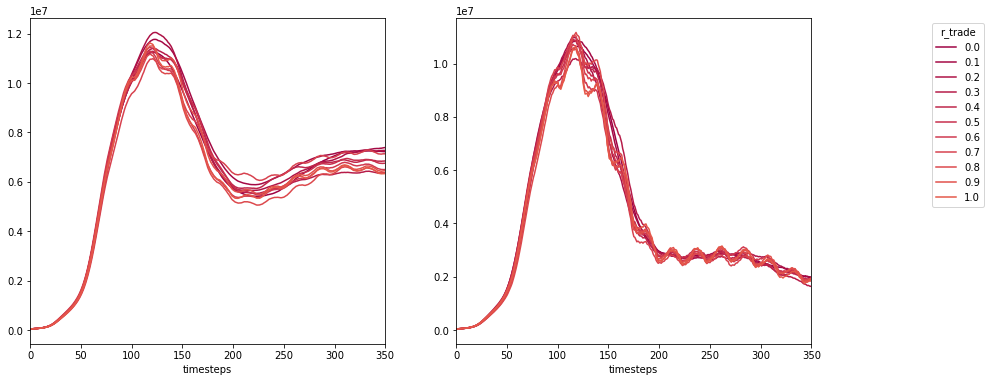

In [23]:
key=[False, 'total_population', 5000.]
level=['precip_amplitude', 'observables', 'kill_cities_without_cropps']
unstack = ['r_trade']

plotlines(data, level, key, unstack)

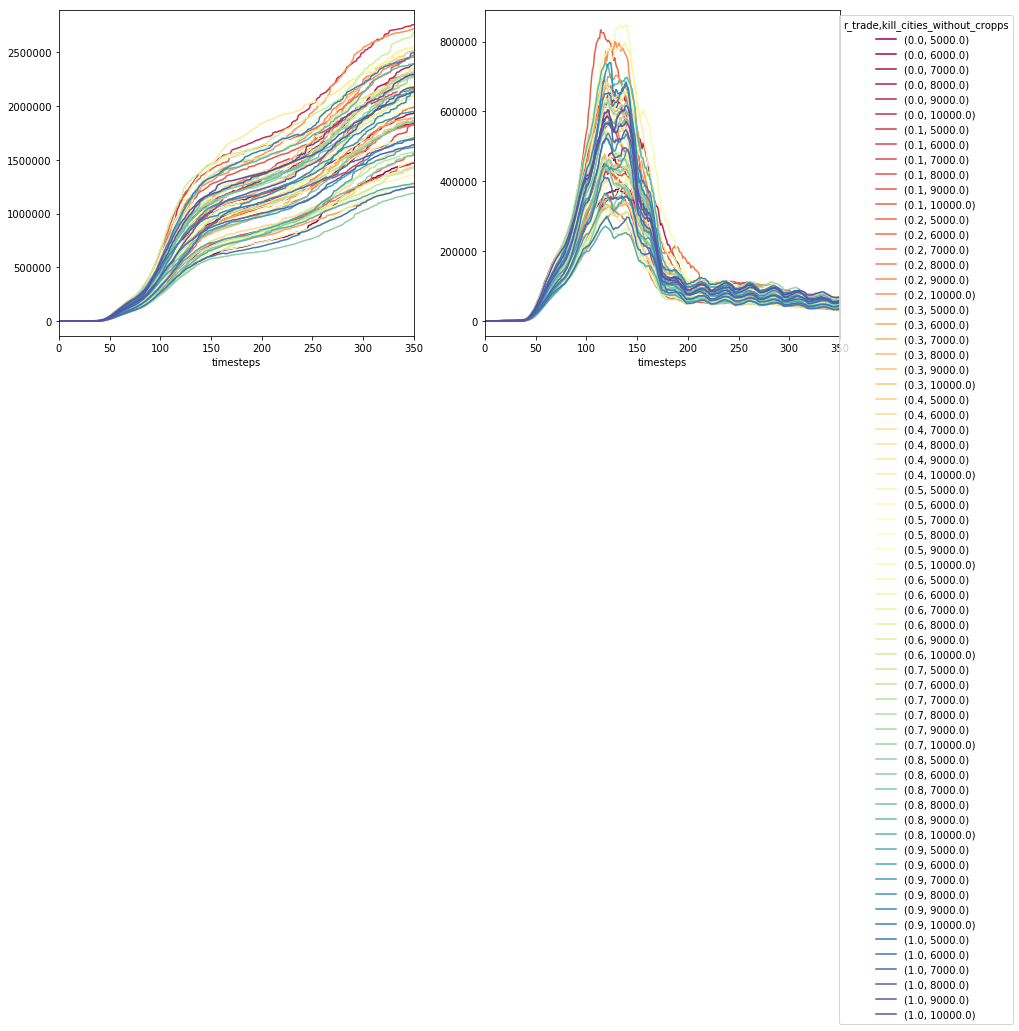

In [11]:
key=[False, 'total_income_trade']
level=['precip_amplitude', 'observables']
unstack = ['r_trade', 'kill_cities_without_cropps']

plotlines(data, level, key, unstack)